In [115]:
!pip install config

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scst
import scipy.optimize as scop
import pandas as pd

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
salary_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MB school/дз 2/Salary_Data.csv')
salary_data.head(15)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [8]:
salary_data['Gender'] = salary_data['Gender'].replace({'Female': 1, 'Male': 0})
salary_drop = salary_data.drop(columns=['Education Level',	'Job Title'])
salary_drop

,Age,Gender,Years of Experience,Salary
0,32.0,0,5.0,90000.0
1,28.0,1,3.0,65000.0
2,45.0,0,15.0,150000.0
3,36.0,1,7.0,60000.0
4,52.0,0,20.0,200000.0
...,...,...,...,...
6699,49.0,1,20.0,200000.0
6700,32.0,0,3.0,50000.0
6701,30.0,1,4.0,55000.0
6702,46.0,0,14.0,140000.0


In [ ]:
salary_new.to_csv('/content/drive/MyDrive/Colab Notebooks/MB school/дз 2/men_woman.csv', index = False)

In [9]:
pr = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MB school/дз 2/men_woman.csv")
pr

,Salary_men,Salary_woman,Age_men,Age_woman,Years_exp_men,Years_exp_woman
0,90000.0,65000.0,32.0,28.0,5.0,3.0
1,150000.0,60000.0,45.0,36.0,15.0,7.0
2,200000.0,120000.0,52.0,42.0,20.0,12.0
3,55000.0,45000.0,29.0,26.0,2.0,1.0
4,80000.0,140000.0,31.0,48.0,4.0,18.0
...,...,...,...,...,...,...
6607,70000.0,200000.0,30.0,49.0,5.0,20.0
6608,160000.0,50000.0,46.0,32.0,16.0,3.0
6609,35000.0,55000.0,26.0,30.0,1.0,4.0
6610,130000.0,140000.0,42.0,46.0,13.0,14.0


In [10]:
val_1 = []
val_2 = []
pd = '/content/drive/MyDrive/Colab Notebooks/MB school/дз 2/men_woman.csv'

In [11]:
def Normality_checker(List_of_values, alpha=0.05):
    n = len(List_of_values)
    Checker_vector = []
    for i in range(n):
        if 1-scst.shapiro(List_of_values[1]).statistic < alpha:
            Checker_vector.append(True)
        else:
            Checker_vector.append(False)
    return Checker_vector

In [12]:
def Mean_square_func(V_variavle, V_fixed):
    N = len(V_variavle) if len(V_variavle) == len(V_fixed) else 0
    try:
        S_square = np.sum(np.power(np.abs(V_variavle- V_fixed),2)) / (N-1)
    except ZeroDivisionError:
        if N == "0":
            raise("Mean_square_func - must have arg with equal lens!")
        else:
            raise("Mean_square_func - arg must be great then 1!")
    else:
        return S_square


In [13]:
with open(pd , 'r') as INPUT:
  for String in INPUT:
    String_split = String.strip().split(',')
    try:
      String_split = [float(i) for i in String_split]
    except ValueError:
      continue
    else:
      val_1.append(String_split[0])
      val_2.append(String_split[2])

In [14]:
val_1 = np.array(val_1)
val_2 = np.array(val_2)
val_1_log = np.log(val_1)
val_2_log = np.log(val_2)


print('Нормальность распределения по Шапиро Уилка: ', Normality_checker([val_1_log, val_2_log]))

Нормальность распределения по Шапиро Уилка:  [True, True]


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [15]:
def Linear_regression_one_demetion(X_values, Pars):
  N = len(X_values)
  if len(Pars) == 2:
    return np.ones(N)*Pars[0]+Pars[1]*X_values
  else:
    raise('*With Pars troubles! *')

In [16]:
import numpy as np
import scipy.optimize as scop

Target_func = lambda Pars: Mean_square_func(Linear_regression_one_demetion(val_1, Pars), val_2) #summ

Pars_init = [0, 1]

res = scop.minimize(Target_func, Pars_init, method='SLSQP', options={'eps': 1e-2, 'ftol': 1e-5, 'disp': True, 'maxiter': 90})

val_2_fitted = Linear_regression_one_demetion(val_1, res.x)


Iteration limit reached    (Exit mode 9)
            Current function value: 630385.9281135248
            Iterations: 90
            Function evaluations: 1150
            Gradient evaluations: 90


In [17]:
def Determination(Y_vector_exp, Y_vector_fit):
  Mean = lambda Y: np.sum(Y)/len(Y)
  Variance = lambda Y, y_mean : np.sum(np.power(Y - np.ones(len(Y))* y_mean, 2))
  y_mean_exp = Mean(Y_vector_exp)
  return Variance(Y_vector_fit, y_mean_exp)/ Variance(Y_vector_exp, y_mean_exp)

print('Determination: ', Determination(val_1, val_2))

Determination:  4.798644250058254


In [18]:
def Mean_error_of_approximation(Y_vector_exp, Y_vector_fit):
    n = len(Y_vector_exp)
    if n == len(Y_vector_fit):
        return np.sum(np.fabs( Y_vector_fit - Y_vector_exp)/( Y_vector_fit - Y_vector_exp))/n
    else:
        raise("* Mean_error_of_approximation(a1, a2) must have len a1 = len a2 *")

print('Mean_error_of_approximation: ', Mean_error_of_approximation(val_1, val_2))

Mean_error_of_approximation:  -1.0


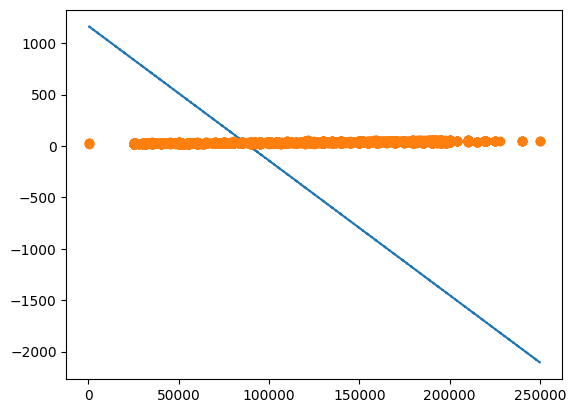

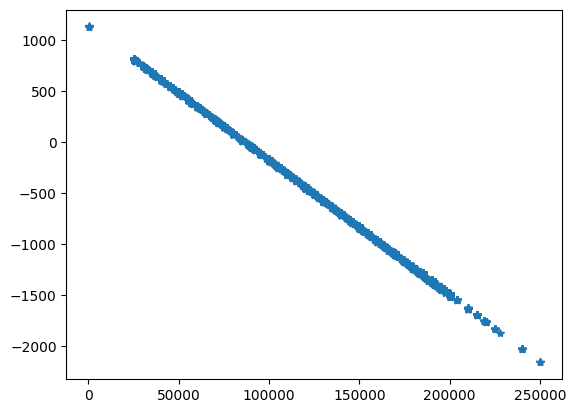

In [19]:
plt.plot(val_1, val_2_fitted, "--", val_1, val_2, "o")
plt.show()
plt.plot(val_1, val_2_fitted - val_2, "*")
plt.show()